In [23]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    plt.show()

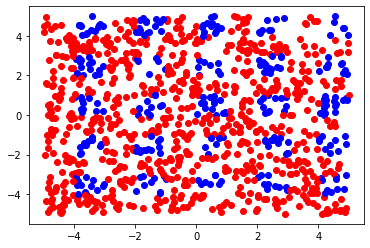

(2, 1000)
(1, 1000)


In [25]:
#Q7
num_data=1000 # data points per class

X=np.random.uniform(-5,5,[2,num_data])
y=(np.floor(X[0,:]%2)==0)& (np.floor(X[1,:]%2)==0)>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [102]:
class Net(nn.Module):

  def __init__(self, input, hid1, hid2, hid3, output):
    super(Net, self).__init__()
    self.w1 = nn.Linear(input, hid1)
    self.w2 = nn.Linear(hid1, hid2)
    self.w3 = nn.Linear(hid2, hid3)
    self.w4 = nn.Linear(hid3, output)
    self.relu = nn.ReLU()
    self.l_func = nn.MSELoss()
    self.optim = torch.optim.Adagrad(self.parameters(), lr=0.01, lr_decay=0, weight_decay=0)
  

  def forward(self, x):
    out = self.w1(x)
    out = self.relu(out)
    out = self.w2(out)
    out = self.relu(out)
    out = self.w3(out)
    out = self.relu(out)
    out = self.w4(out)
    out = self.relu(out)
    return out

  
  def b_pro(self, out, y):
    self.optim.zero_grad()
    self.loss = self.l_func(out, y)
    self.loss.backward()
    self.optim.step()
    return self.loss


In [103]:
ls = []
net = Net(2, 100, 50, 10, 1)
xx = torch.from_numpy(X.T).float()
yy = torch.from_numpy(y.T).float()

In [104]:
for i in range(10000):
  ls.append(net.b_pro(net.forward(xx), yy))

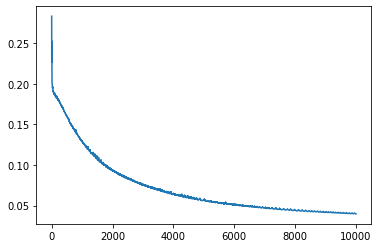

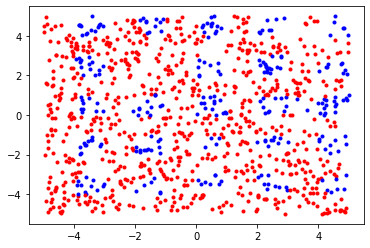

In [106]:
plt.plot(ls)
plotClass(X, net.forward(xx).T.detach().numpy() > 0.5, '.')